In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
df = pd.read_csv('./data/2019.csv')

In [3]:
df.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


### Map countries to a region based on the 2016 dataset which contains both columns

In [4]:
for_mapping = pd.read_csv('./clean/2016.csv')

In [5]:
region_map = dict(for_mapping[['Country', 'Region']].values)
df['Region'] = df['Country or region'].map(region_map)
df.tail(10)
#Central African Republic is not mapped to a region!

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Sub-Saharan Africa
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,Middle East and Northern Africa
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,Sub-Saharan Africa
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Middle East and Northern Africa
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Sub-Saharan Africa


### Rename columns so they're consistent across notebooks

In [6]:
df = df.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family','Healthy life expectancy':'Health (Life Expectancy)', 
               'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

In [7]:
df.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [8]:
df = df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Region']]

In [9]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


### No dystopia column so I created one by subtracting the sum of Economy, GDP, Family, Generosity and Trust columns from the Happiness Score

In [10]:
df['Dystopia'] = df['Happiness Score'] - (df['Economy (GDP per Capita)']+ df['Family'] + df['Health (Life Expectancy)']
                                         + df['Freedom'] + df['Generosity'] + df['Trust (Government Corruption)'])
                                                                                

In [11]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2.394
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2.241
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,2.401
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,2.394


### Plot top 10 happiest countries

In [12]:
top10 = df.head(10)

In [13]:
top10.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2.394


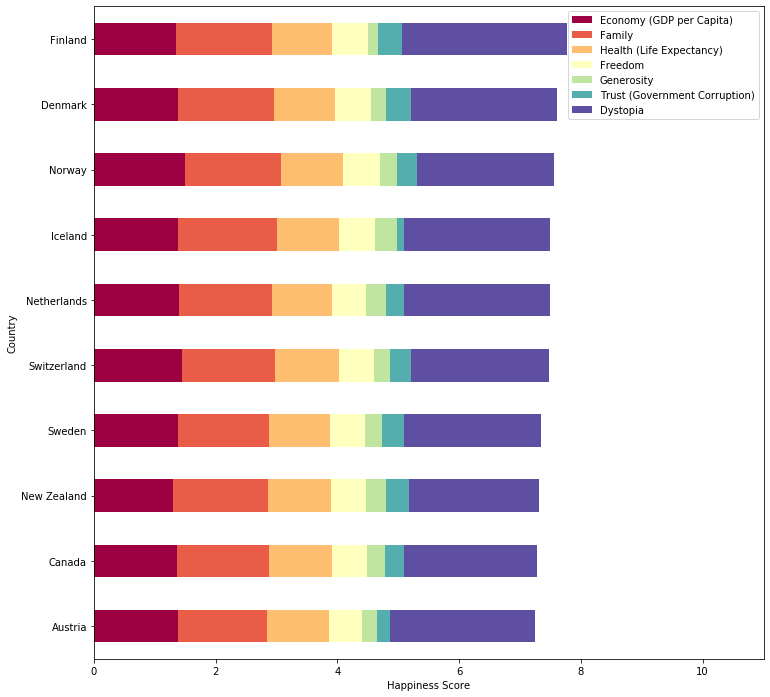

In [14]:
top10.sort_values('Happiness Score', ascending=True).plot(x='Country', 
            y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
               'Trust (Government Corruption)', 'Dystopia'], 
                        kind='barh', stacked=True, figsize=(12,12), colormap='Spectral')
plt.xlabel('Happiness Score')
plt.xlim(0,11)
plt.legend(loc='upper right')

### Bottom 10 countries

In [15]:
bottom10 = df.tail(10)

In [16]:
bottom10

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
146,Haiti,147,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean,1.582
147,Botswana,148,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Sub-Saharan Africa,0.184
148,Syria,149,3.462,0.619,0.378,0.440,0.013,0.331,0.141,Middle East and Northern Africa,1.540
149,Malawi,150,3.410,0.191,0.560,0.495,0.443,0.218,0.089,Sub-Saharan Africa,1.414
150,Yemen,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Middle East and Northern Africa,1.139
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,0.467
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa,0.531
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia,1.792
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN,2.457
155,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Sub-Saharan Africa,1.374


Text(0.5, 0, 'Happiness Score')

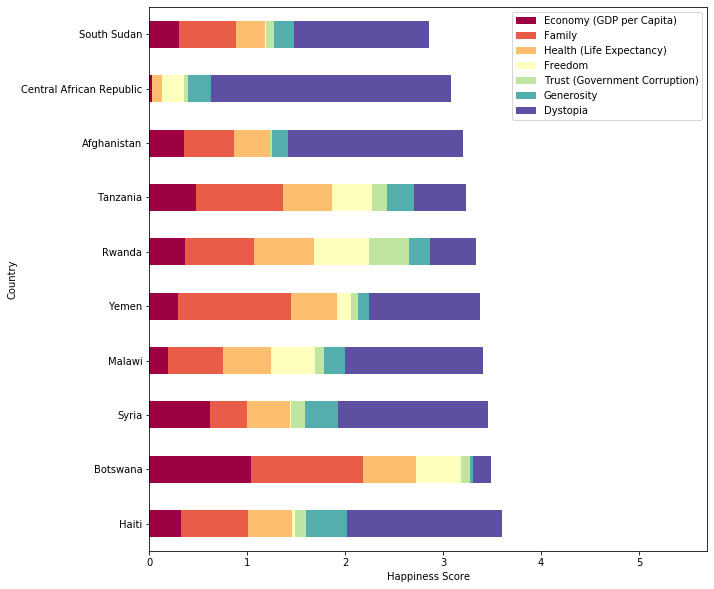

In [17]:
bottom10.sort_values('Happiness Rank', ascending=True).plot(x='Country', 
            y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
               'Trust (Government Corruption)', 'Generosity', 'Dystopia'], 
                        kind='barh', stacked=True, figsize=(10,10), colormap='Spectral')
plt.xlim(0,5.7)
plt.legend(loc='upper right')
plt.xlabel('Happiness Score')

### Happiest/Unhappiest by Region

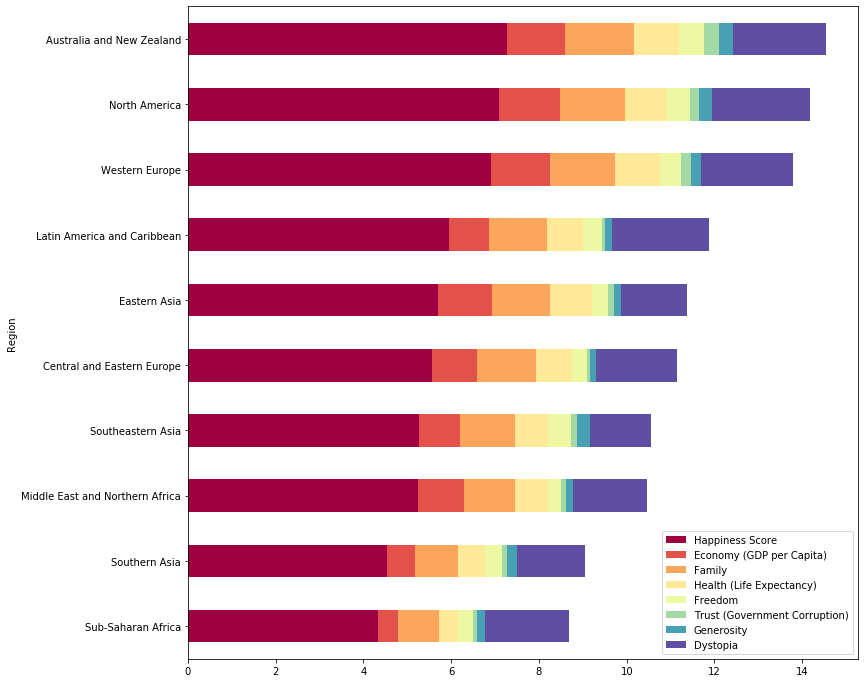

In [18]:
df.groupby('Region')['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
        'Freedom', 'Trust (Government Corruption)' ,'Generosity', 'Dystopia'].mean().sort_values(by='Happiness Score').plot(kind='barh', 
            stacked =True, figsize=(12,12), colormap='Spectral')

In [19]:
WE = df.loc[df.Region=='Western Europe']

Text(0, 0.5, 'Country')

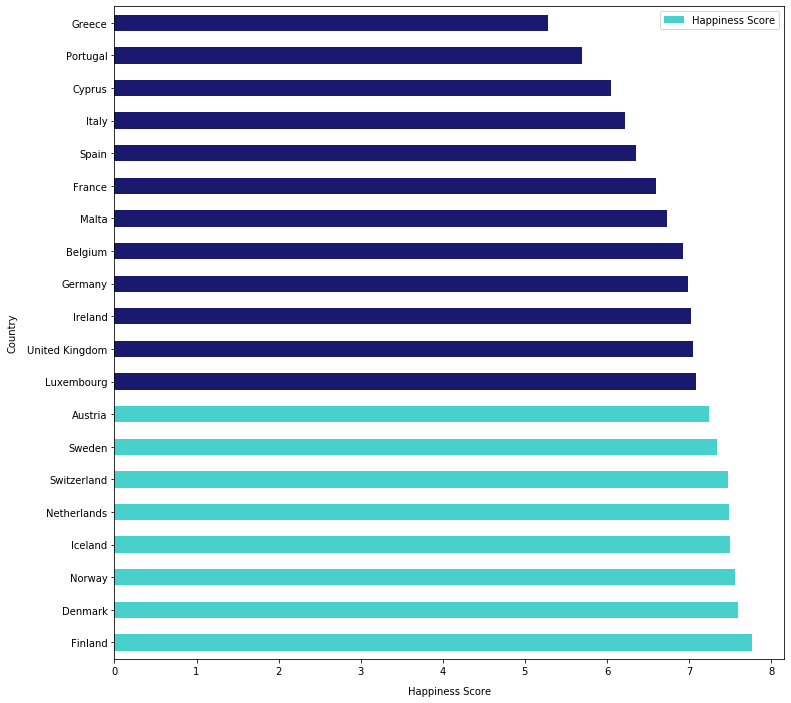

In [21]:
color=['mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','mediumturquoise','midnightblue','midnightblue',
       'midnightblue', 'midnightblue','midnightblue','midnightblue','midnightblue', 'midnightblue','midnightblue','midnightblue',
      'midnightblue','midnightblue','midnightblue']
#firebrick', 'darksalmon','olivedrab', 'lightseagreen','darkorchid', 'royalblue', 'slategray', 'lavender',
      #'forestgreen', 'thistle', 'teal', 'tomato', 'powderblue']


WE.plot(y='Happiness Score', x='Country', kind='barh', color=color , figsize=(12,12))
plt.xlabel('Happiness Score', labelpad=10)
plt.ylabel('Country', labelpad=10)



In [22]:
ss_africa = df.loc[df['Region']=='Sub-Saharan Africa']

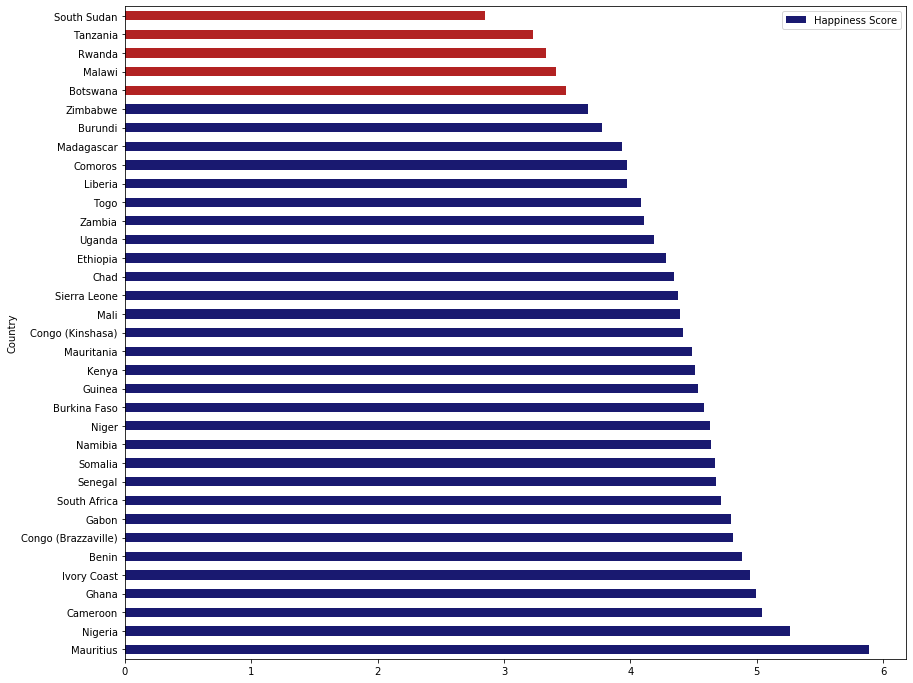

In [23]:
color2 = ['midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue',
          'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 'midnightblue', 
          'midnightblue', 'midnightblue', 'firebrick', 'firebrick', 
          'firebrick','firebrick','firebrick','firebrick','firebrick','firebrick','firebrick','firebrick' ]
          #,'midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue','midnightblue',
         #'midnightblue','midnightblue','midnightblue','midnightblue','midnightblue']
ss_africa.plot(y='Happiness Score', x='Country', kind='barh', color=color2 , figsize=(14,12))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

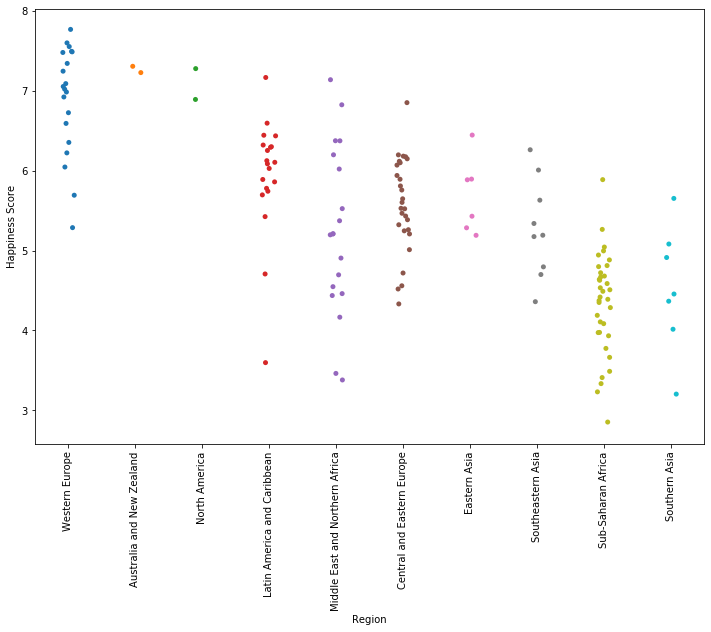

In [24]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Region', y='Happiness Score', data=df, jitter=True)
plt.xticks(rotation=90)


### Create heatmap to see correlation between different variables

In [25]:
corr = df.iloc[:, 3:12]
corr.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia
0,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe,2.714
1,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2.394
2,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2.241
3,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe,2.401
4,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe,2.394


In [26]:
corr_map = corr.corr()

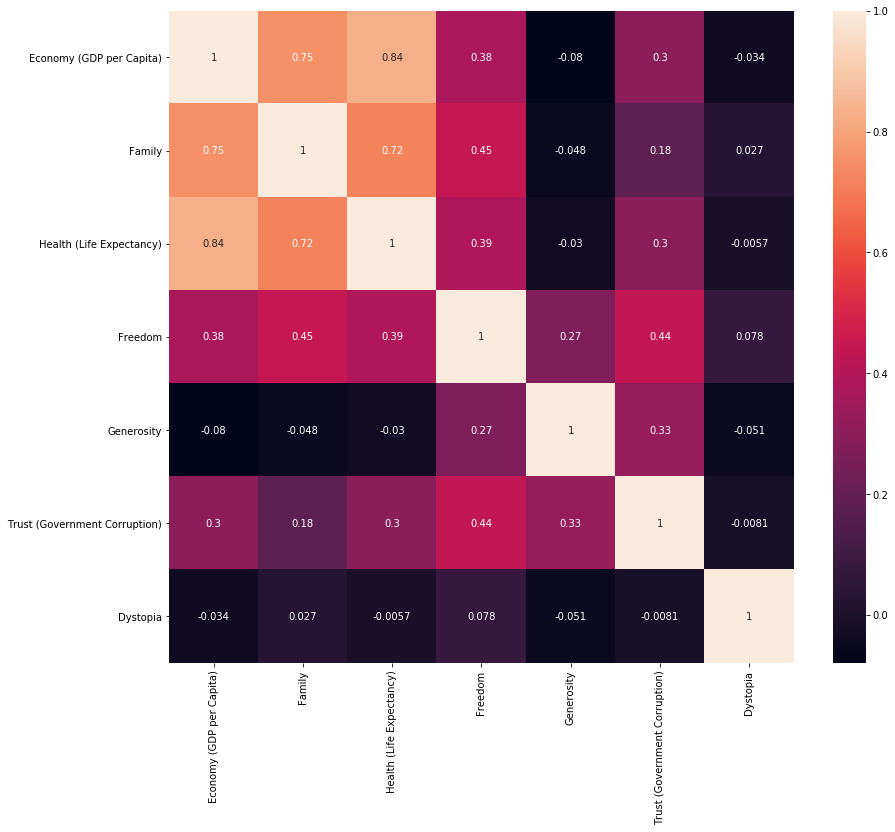

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_map, xticklabels=corr_map.columns, yticklabels=corr_map.columns, annot=True)

### Plot world happiness scores on a map

In [28]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'},
           colorscale = "Blues")
layout = dict(title = 'World Happiness 2019', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
